In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   row_id   17520 non-null  int64 
 1   date     17520 non-null  object
 2   country  17520 non-null  object
 3   store    17520 non-null  object
 4   product  17520 non-null  object
dtypes: int64(1), object(4)
memory usage: 684.5+ KB


In [5]:
train_data.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


# Exploratory Data Analysis:

In [6]:
train_data.nunique()

row_id      70128
date         1461
country         6
store           2
product         4
num_sold      699
dtype: int64

In [7]:
test_data.nunique()

row_id     17520
date         365
country        6
store          2
product        4
dtype: int64

In [8]:
train_data.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [9]:
test_data.isna().sum()

row_id     0
date       0
country    0
store      0
product    0
dtype: int64

In [10]:
for i in train_data.columns:
  print(i + ": ")
  print(train_data[i].value_counts())
  print()
  print()

row_id: 
0        1
46750    1
46756    1
46755    1
46754    1
        ..
23381    1
23382    1
23383    1
23384    1
70127    1
Name: row_id, Length: 70128, dtype: int64


date: 
2017-01-01    48
2019-09-10    48
2019-09-08    48
2019-09-07    48
2019-09-06    48
              ..
2018-05-01    48
2018-04-30    48
2018-04-29    48
2018-04-28    48
2020-12-31    48
Name: date, Length: 1461, dtype: int64


country: 
Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64


store: 
KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64


product: 
Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64


num_sold: 
81     404
89     402
100    402
85     402
108    392
      ... 
735      1
863      1
878      1
583      1
678      1
Name: num_sold, Length: 699, dtyp

The Categorical attributes have to be encoded.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['store'] = le.fit_transform(train_data['store'])

In [12]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [2])], remainder='passthrough')
#train_data = np.array(columnTransformer.fit_transform(train_data))
#train_data = pd.DataFrame(train_data)
#train_data.head(30)

In [13]:
print(train_data['store'].value_counts())
print(train_data['store'].shape)

0    35064
1    35064
Name: store, dtype: int64
(70128,)


In [14]:
train_data2 = pd.get_dummies(train_data['country'])
train_data.drop('country',axis=1,inplace = True)
train_data = pd.concat([train_data,train_data2],axis = 1 , join = 'inner')

In [15]:
train_data3 = pd.get_dummies(train_data['product'])
train_data.drop('product',axis=1,inplace = True)
train_data = pd.concat([train_data,train_data3],axis = 1 , join = 'inner')
train_data.head(30)

,row_id,date,store,num_sold,Belgium,France,Germany,Italy,Poland,Spain,Kaggle Advanced Techniques,Kaggle Getting Started,Kaggle Recipe Book,Kaggle for Kids: One Smart Goose
0,0,2017-01-01,0,663,1,0,0,0,0,0,1,0,0,0
1,1,2017-01-01,0,615,1,0,0,0,0,0,0,1,0,0
2,2,2017-01-01,0,480,1,0,0,0,0,0,0,0,1,0
3,3,2017-01-01,0,710,1,0,0,0,0,0,0,0,0,1
4,4,2017-01-01,1,240,1,0,0,0,0,0,1,0,0,0
5,5,2017-01-01,1,187,1,0,0,0,0,0,0,1,0,0
6,6,2017-01-01,1,158,1,0,0,0,0,0,0,0,1,0
7,7,2017-01-01,1,267,1,0,0,0,0,0,0,0,0,1
8,8,2017-01-01,0,610,0,1,0,0,0,0,1,0,0,0
9,9,2017-01-01,0,463,0,1,0,0,0,0,0,1,0,0


In [16]:
train_data.shape

(70128, 14)

In [17]:
date = pd.to_datetime(train_data['date'])
train_data['date_year'] = date.dt.year
train_data['date_month'] = date.dt.month
train_data['date_day'] = date.dt.day
train_data.drop('date',axis = 1, inplace= True)

In [18]:
labels = train_data['num_sold']
train_data.drop('num_sold',axis=1,inplace = True)
features = train_data

In [19]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   row_id                            70128 non-null  int64
 1   store                             70128 non-null  int64
 2   Belgium                           70128 non-null  uint8
 3   France                            70128 non-null  uint8
 4   Germany                           70128 non-null  uint8
 5   Italy                             70128 non-null  uint8
 6   Poland                            70128 non-null  uint8
 7   Spain                             70128 non-null  uint8
 8   Kaggle Advanced Techniques        70128 non-null  uint8
 9   Kaggle Getting Started            70128 non-null  uint8
 10  Kaggle Recipe Book                70128 non-null  uint8
 11  Kaggle for Kids: One Smart Goose  70128 non-null  uint8
 12  date_year                       

In [20]:
type(labels)

pandas.core.series.Series

In [21]:
features.head(50)

,row_id,store,Belgium,France,Germany,Italy,Poland,Spain,Kaggle Advanced Techniques,Kaggle Getting Started,Kaggle Recipe Book,Kaggle for Kids: One Smart Goose,date_year,date_month,date_day
0,0,0,1,0,0,0,0,0,1,0,0,0,2017,1,1
1,1,0,1,0,0,0,0,0,0,1,0,0,2017,1,1
2,2,0,1,0,0,0,0,0,0,0,1,0,2017,1,1
3,3,0,1,0,0,0,0,0,0,0,0,1,2017,1,1
4,4,1,1,0,0,0,0,0,1,0,0,0,2017,1,1
5,5,1,1,0,0,0,0,0,0,1,0,0,2017,1,1
6,6,1,1,0,0,0,0,0,0,0,1,0,2017,1,1
7,7,1,1,0,0,0,0,0,0,0,0,1,2017,1,1
8,8,0,0,1,0,0,0,0,1,0,0,0,2017,1,1
9,9,0,0,1,0,0,0,0,0,1,0,0,2017,1,1


In [22]:
#features2 = pd.get_dummies(train_data['date_year'])
#features.drop('date_year',axis=1,inplace = True)
#features = pd.concat([features,features2],axis = 1 , join = 'inner')
#features.head(30)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features['date_year'] = le.fit_transform(features['date_year'])
features['date_year'].value_counts()

3    17568
0    17520
1    17520
2    17520
Name: date_year, dtype: int64

In [23]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   row_id                            70128 non-null  int64
 1   store                             70128 non-null  int64
 2   Belgium                           70128 non-null  uint8
 3   France                            70128 non-null  uint8
 4   Germany                           70128 non-null  uint8
 5   Italy                             70128 non-null  uint8
 6   Poland                            70128 non-null  uint8
 7   Spain                             70128 non-null  uint8
 8   Kaggle Advanced Techniques        70128 non-null  uint8
 9   Kaggle Getting Started            70128 non-null  uint8
 10  Kaggle Recipe Book                70128 non-null  uint8
 11  Kaggle for Kids: One Smart Goose  70128 non-null  uint8
 12  date_year                       

In [24]:
features.head()

,row_id,store,Belgium,France,Germany,Italy,Poland,Spain,Kaggle Advanced Techniques,Kaggle Getting Started,Kaggle Recipe Book,Kaggle for Kids: One Smart Goose,date_year,date_month,date_day
0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1
2,2,0,1,0,0,0,0,0,0,0,1,0,0,1,1
3,3,0,1,0,0,0,0,0,0,0,0,1,0,1,1
4,4,1,1,0,0,0,0,0,1,0,0,0,0,1,1


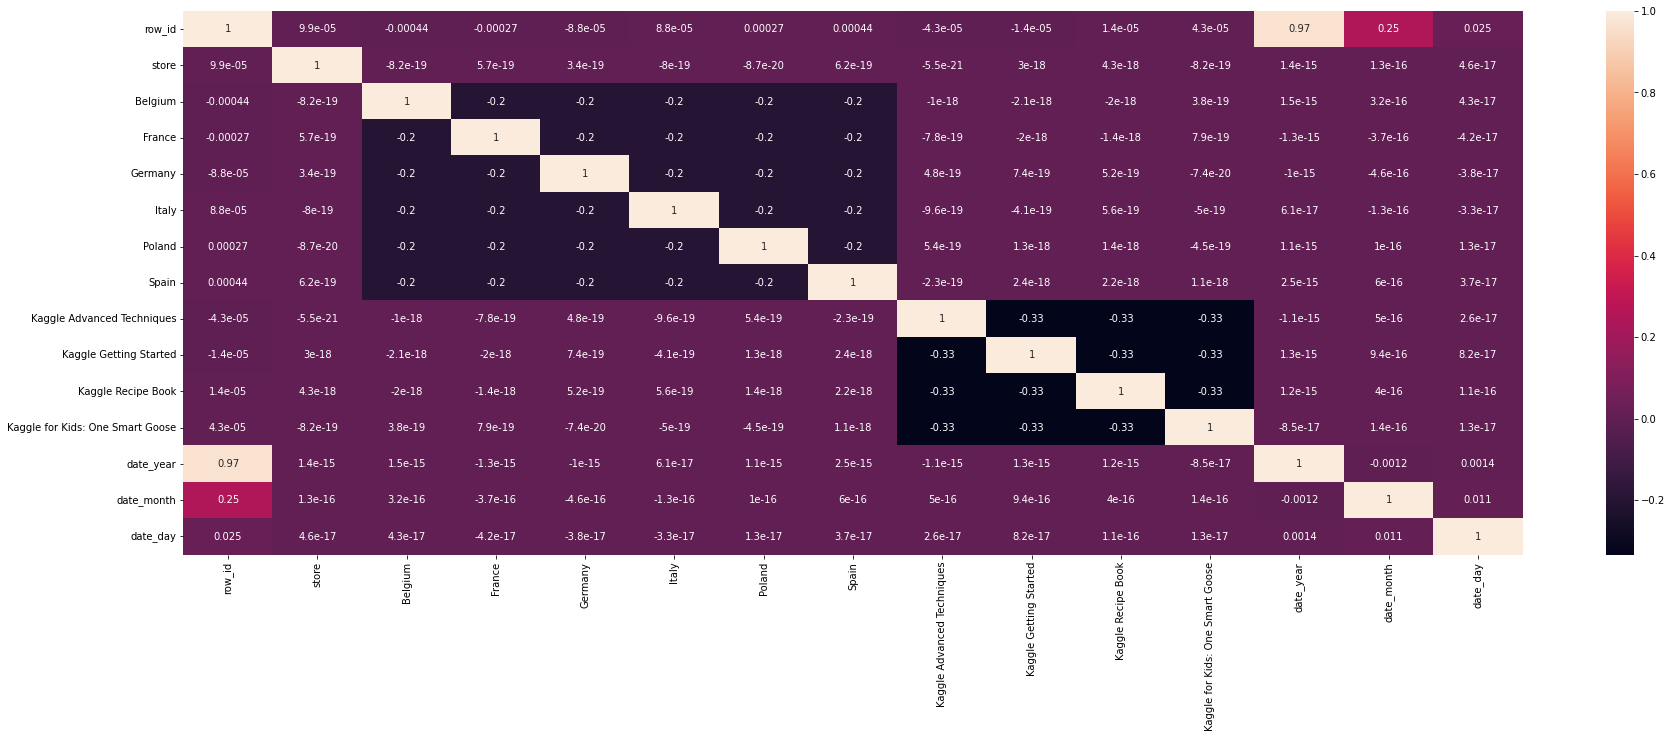

In [25]:
plt.figure(figsize = (30, 10))
sns.heatmap(features.corr(),annot = True)

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features , labels,test_size = 0.3,random_state = 42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor 
from sklearn.pipeline import make_pipeline

In [28]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO', Lasso(random_state = 100)))
models.append(('EN', ElasticNet(random_state = 100)))
models.append(('RIDGE', Ridge(random_state = 100)))
models.append(('KNN',KNeighborsRegressor()))
models.append(('SVR',SVR()))
models.append(('CART',DecisionTreeRegressor(random_state = 100)))
models.append(('RandomForest' , RandomForestRegressor(random_state = 42)))
models.append(('GradientBoost' , GradientBoostingRegressor(random_state = 42)))
models.append(('AdaBoost', AdaBoostRegressor(random_state = 42)))
models.append(('XGBoost' , XGBRegressor(random_forest = 42)))

In [29]:
scores = []
names = []
for name,model in models:
  model.fit(xtrain,ytrain)
  names.append(name)
  sc = model.score(xtest,ytest)
  scores.append(sc)
  print(name, ' train_score : ',np.round(model.score(xtrain,ytrain)))
  print(name, ' test_score : ', np.round(sc,3))

LR  train_score :  1.0
LR  test_score :  0.785
LASSO  train_score :  1.0
LASSO  test_score :  0.78
EN  train_score :  0.0
EN  test_score :  0.421
RIDGE  train_score :  1.0
RIDGE  test_score :  0.784
KNN  train_score :  0.0
KNN  test_score :  -0.074
SVR  train_score :  -0.0
SVR  test_score :  -0.099
CART  train_score :  1.0
CART  test_score :  0.959
RandomForest  train_score :  1.0
RandomForest  test_score :  0.972
GradientBoost  train_score :  1.0
GradientBoost  test_score :  0.935
AdaBoost  train_score :  1.0
AdaBoost  test_score :  0.665
[04:06:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost  train_score :  1.0
XGBoost  test_score :  0.935


In [30]:
features.corr()

,row_id,store,Belgium,France,Germany,Italy,Poland,Spain,Kaggle Advanced Techniques,Kaggle Getting Started,Kaggle Recipe Book,Kaggle for Kids: One Smart Goose,date_year,date_month,date_day
row_id,1.000000,9.879368e-05,-4.418188e-04,-2.650913e-04,-8.836375e-05,8.836375e-05,2.650913e-04,4.418188e-04,-4.277892e-05,-1.425964e-05,1.425964e-05,4.277892e-05,9.682456e-01,2.479599e-01,2.478281e-02
store,0.000099,1.000000e+00,-8.219890e-19,5.671087e-19,3.419644e-19,-7.986250e-19,-8.708410e-20,6.159607e-19,-5.484151e-21,3.025423e-18,4.299574e-18,-8.153104e-19,1.359154e-15,1.265848e-16,4.566586e-17
Belgium,-0.000442,-8.219890e-19,1.000000e+00,-2.000000e-01,-2.000000e-01,-2.000000e-01,-2.000000e-01,-2.000000e-01,-1.047255e-18,-2.123940e-18,-2.040552e-18,3.752458e-19,1.453613e-15,3.217762e-16,4.261863e-17
France,-0.000265,5.671087e-19,-2.000000e-01,1.000000e+00,-2.000000e-01,-2.000000e-01,-2.000000e-01,-2.000000e-01,-7.823752e-19,-1.986595e-18,-1.415756e-18,7.946381e-19,-1.290128e-15,-3.742027e-16,-4.231162e-17
Germany,-0.000088,3.419644e-19,-2.000000e-01,-2.000000e-01,1.000000e+00,-2.000000e-01,-2.000000e-01,-2.000000e-01,4.758019e-19,7.357761e-19,5.168827e-19,-7.357761e-20,-1.019514e-15,-4.604845e-16,-3.788988e-17
Italy,0.000088,-7.986250e-19,-2.000000e-01,-2.000000e-01,-2.000000e-01,1.000000e+00,-2.000000e-01,-2.000000e-01,-9.601878e-19,-4.108083e-19,5.622555e-19,-4.954225e-19,6.076829e-17,-1.270976e-16,-3.286956e-17
Poland,0.000265,-8.708410e-20,-2.000000e-01,-2.000000e-01,-2.000000e-01,-2.000000e-01,1.000000e+00,-2.000000e-01,5.420217e-19,1.307229e-18,1.357507e-18,-4.537286e-19,1.066315e-15,9.950968e-17,1.321309e-17
Spain,0.000442,6.159607e-19,-2.000000e-01,-2.000000e-01,-2.000000e-01,-2.000000e-01,-2.000000e-01,1.000000e+00,-2.329958e-19,2.398630e-18,2.150919e-18,1.069328e-18,2.494979e-15,5.954863e-16,3.736661e-17
Kaggle Advanced Techniques,-0.000043,-5.484151e-21,-1.047255e-18,-7.823752e-19,4.758019e-19,-9.601878e-19,5.420217e-19,-2.329958e-19,1.000000e+00,-3.333333e-01,-3.333333e-01,-3.333333e-01,-1.075965e-15,5.009194e-16,2.611259e-17
Kaggle Getting Started,-0.000014,3.025423e-18,-2.123940e-18,-1.986595e-18,7.357761e-19,-4.108083e-19,1.307229e-18,2.398630e-18,-3.333333e-01,1.000000e+00,-3.333333e-01,-3.333333e-01,1.316097e-15,9.441460e-16,8.219327e-17


In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scoring = 'r2'
results = []
names= []
n_splits = 5

for name,model in models:
  kfold = KFold(n_splits = n_splits,shuffle =True, random_state =105)
  cv_results = cross_val_score(model,xtrain,ytrain,cv = kfold,scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)

LR : 0.786425 (0.005064)
LASSO : 0.781064 (0.005632)
EN : 0.421088 (0.004771)
RIDGE : 0.784936 (0.004944)
KNN : -0.172442 (0.009995)
SVR : -0.107534 (0.007183)
CART : 0.954942 (0.000534)
RandomForest : 0.969443 (0.000751)
GradientBoost : 0.937176 (0.003007)
AdaBoost : 0.665144 (0.018309)
[04:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost : 0.936998 (0.003972)


In [91]:
results_df = pd.DataFrame(results,index=names,columns='cv1 cv2 cv3 cv4 cv5'.split())
results_df['cv Mean'] = results_df.iloc[:,0:n_splits].mean(axis = 1)
results_df['CV Std'] = results_df.iloc[:,0:n_splits].std(axis = 1)
results_df.sort_values(by = 'cv Mean',ascending = False)*100

,cv1,cv2,cv3,cv4,cv5,cv Mean,CV Std
RandomForest,97.051019,96.824744,96.908023,96.971288,96.966448,96.944304,0.083990
CART,95.479062,95.499117,95.552154,95.401433,95.539189,95.494191,0.059669
GradientBoost,93.816742,93.375232,93.607759,93.539964,94.248076,93.717555,0.336180
XGBoost,93.977169,93.480061,93.194602,93.530952,94.316207,93.699798,0.444103
LR,78.972158,78.259157,78.059923,78.468293,79.453097,78.642525,0.566224
RIDGE,78.815281,78.148371,77.891220,78.336917,79.275963,78.493550,0.552758
LASSO,78.553726,77.757840,77.353207,77.942425,78.925047,78.106449,0.629676
AdaBoost,67.404809,64.800945,65.401299,65.255587,69.709504,66.514429,2.047013
EN,42.419547,41.696163,41.480107,42.150720,42.797383,42.108784,0.533384
SVR,-10.417274,-11.854640,-11.254716,-9.803148,-10.437033,-10.753362,0.803134


In [92]:

model = GradientBoostingRegressor(random_state = 100)
model.fit(xtrain,ytrain)


GradientBoostingRegressor(random_state=100)

In [93]:
ypred = model.predict(xtest)

In [94]:
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))

0.9348297560866012


In [95]:
print(r2_score(ytrain,model.predict(xtrain)))

0.9371293031692036


In [96]:
test_data.head()

,row_id,store,Belgium,France,Germany,Italy,Poland,Spain,Kaggle Advanced Techniques,Kaggle Getting Started,Kaggle Recipe Book,Kaggle for Kids: One Smart Goose,date_year,date_month,date_day
0,70128,0,1,0,0,0,0,0,1,0,0,0,1,1,1
1,70129,0,1,0,0,0,0,0,0,1,0,0,1,1,1
2,70130,0,1,0,0,0,0,0,0,0,1,0,1,1,1
3,70131,0,1,0,0,0,0,0,0,0,0,1,1,1,1
4,70132,1,1,0,0,0,0,0,1,0,0,0,1,1,1


In [ ]:
test_data2 = pd.get_dummies(test_data['country'])
test_data.drop('country',axis=1,inplace = True)
test_data = pd.concat([test_data,test_data2],axis = 1 , join = 'inner')

In [ ]:
test_data3 = pd.get_dummies(test_data['product'])
test_data.drop('product',axis=1,inplace = True)
test_data = pd.concat([test_data,test_data3],axis = 1 , join = 'inner')
test_data.head(30)

In [ ]:
date = pd.to_datetime(test_data['date'])
test_data['date_year'] = date.dt.year
test_data['date_month'] = date.dt.month
test_data['date_day'] = date.dt.day
test_data.drop('date',axis = 1, inplace= True)

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data['store'] = le.fit_transform(test_data['store'])

In [104]:
test_data2 = pd.get_dummies(test_data['date_year'])
test_data.drop('date_year',axis=1,inplace = True)
test_data = pd.concat([test_data,test_data2],axis = 1 , join = 'inner')


In [ ]:
test_data.head()

In [138]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   row_id                            17520 non-null  int64
 1   store                             17520 non-null  int64
 2   Belgium                           17520 non-null  uint8
 3   France                            17520 non-null  uint8
 4   Germany                           17520 non-null  uint8
 5   Italy                             17520 non-null  uint8
 6   Poland                            17520 non-null  uint8
 7   Spain                             17520 non-null  uint8
 8   Kaggle Advanced Techniques        17520 non-null  uint8
 9   Kaggle Getting Started            17520 non-null  uint8
 10  Kaggle Recipe Book                17520 non-null  uint8
 11  Kaggle for Kids: One Smart Goose  17520 non-null  uint8
 12  date_year                       

In [106]:
test_data['date_year'] = test_data[1]
test_data.drop(1,axis = 1 ,inplace = True)

In [ ]:
test_data.info()

In [108]:
test_data = test_data[['row_id','store','Belgium','France','Germany','Italy','Poland','Spain',"Kaggle Advanced Techniques","Kaggle Getting Started","Kaggle Recipe Book","Kaggle for Kids: One Smart Goose","date_year","date_month","date_day"]]

In [113]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   row_id                            17520 non-null  int64
 1   store                             17520 non-null  int64
 2   Belgium                           17520 non-null  uint8
 3   France                            17520 non-null  uint8
 4   Germany                           17520 non-null  uint8
 5   Italy                             17520 non-null  uint8
 6   Poland                            17520 non-null  uint8
 7   Spain                             17520 non-null  uint8
 8   Kaggle Advanced Techniques        17520 non-null  uint8
 9   Kaggle Getting Started            17520 non-null  uint8
 10  Kaggle Recipe Book                17520 non-null  uint8
 11  Kaggle for Kids: One Smart Goose  17520 non-null  uint8
 12  date_year                       

In [ ]:
features.shape

In [ ]:
test_data.shape

In [112]:
test_data_predict = model.predict(test_data)

In [ ]:
test_data_predict = test_data_predict.astype(int)

In [134]:
results = pd.concat([test_data['row_id'] , pd.DataFrame(test_data_predict)], axis=1, join='inner')

In [142]:
results['num_sold'] = results[0]
results.drop(0,axis = 1,inplace= True)

In [ ]:
results.head()

In [144]:
result = results.to_csv("results.csv")